# Accessing ECCOv4 release 5 output in the AWS Cloud

[Introduction](https://ecco-access.readthedocs.io/ECCO_access_v4r5.html#introduction)\
[SST comparison: v4r4 vs. v4r5](https://ecco-access.readthedocs.io/ECCO_access_v4r5.html#sst-comparison-v4r4-vs-v4r5)\
[Momentum budget terms in v4r5](https://ecco-access.readthedocs.io/ECCO_access_v4r5.html#momentum-budget-terms-in-v4r5)

## Introduction

In addition to accessing the ECCOv4r4 Central Estimate output released on PO.DAAC, `ecco_access` functions can also retrieve output from the newer release 5 (ECCOv4r5). Unlike v4r4, for which many fields can be accessed at monthly/daily/snapshot time resolutions and native/latlon grid configurations, only the v4r5 monthly mean native grid outputs are currently accessible, and `ecco_access` can only retrieve them within the AWS Cloud. However, a number of fields were archived in v4r5 that were not archived in v4r4, including the terms of momentum and sea-ice budgets.


## SST comparison: v4r4 vs. v4r5

First let's consider a field that is archived in both releases: potential temperature in the top layer, or SST. Accessing the monthly mean potential temperature for 1998 from v4r4 (and assuming we don't know the ShortName already):

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from os.path import join,expanduser

import ecco_v4_py as ecco
import ecco_access as ea

# identify user's home directory
user_home_dir = expanduser('~')

> **Note:**
> If using `s3_open_fsspec` mode, you will need access to json files that are hosted on the `s3://ecco-model-granules/` bucket, a ["requester pays"](https://docs.aws.amazon.com/AmazonS3/latest/userguide/RequesterPaysBuckets.html) bucket. This means that the entity requesting the data (i.e., you) would pay the data transfer fees. However, no need to get alarmed! When transferring data within the same AWS region as the bucket, the requester does not have to pay any data transfer fees. If your AWS EC2 instance is set up in the same region *us-west-2 (Oregon)* as the `ecco-model-granules` bucket, there will be no cost associated with the data transfer.
> 
> When accessing data from the `ecco-model-granules` bucket, a prompt appears by default to remind the user that the data access is "requester pays". This prompt can be suppressed by setting `prompt_request_payer=False`.

In [2]:
# open v4r4 monthly v4r4 temperature fields for 1998, using s3_open_fsspec mode
ds_T_v4r4 = ea.ecco_podaac_to_xrdataset('temperature',\
                                            version='v4r4',grid='native',time_res='monthly',\
                                            StartDate='1998-01',EndDate='1998-12',\
                                            mode='s3_open_fsspec',\
                                            prompt_request_payer=False)

ShortName Options for query "temperature":
                  Variable Name     Description (units)

Option 1: ECCO_L4_ATM_STATE_LLC0090GRID_MONTHLY_V4R4    *native grid,monthly means*
                  EXFatemp          Atmosphere surface (2 m) air temperature (degK)
                  EXFaqh            Atmosphere surface (2 m) specific humidity (kg/kg)
                  EXFuwind          Wind speed at 10m in the model +x direction (m/s)
                  EXFvwind          Wind speed at 10m in the model +y direction (m/s)
                  EXFwspee          Wind speed (m/s)
                  EXFpress          Atmosphere surface pressure (N/m^2)

Option 2: ECCO_L4_HEAT_FLUX_LLC0090GRID_MONTHLY_V4R4    *native grid,monthly means*
                  EXFhl             Open ocean air-sea latent heat flux (W/m^2)
                  EXFhs             Open ocean air-sea sensible heat flux (W/m^2)
                  EXFlwdn           Downward longwave radiative flux (W/m^2)
                  EXFswd

Please select option [1-5]:  4


Using dataset with ShortName: ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4


Select option 4 (the dataset that contains variables `THETA` and `SALT`), and the requested output is included in the `xarray` dataset `ds_T_v4r4`. Here is the contents of that dataset:

In [3]:
ds_T_v4r4

<xarray.Dataset> Size: 510MB
Dimensions:    (time: 12, k: 50, tile: 13, j: 90, i: 90, nb: 4, j_g: 90,
                i_g: 90, nv: 2, k_l: 50, k_p1: 51, k_u: 50)
Coordinates: (12/22)
  * time       (time) datetime64[ns] 96B 1998-01-16T12:00:00 ... 1998-12-16T1...
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    ...         ...
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            f07693e6-4181-11eb-beb3-0cc47a3f44ff

Now try the same thing, but with v4r5.

> **Note:**
> Access to v4r5 outputs are currently accessed not through PO.DAAC's S3 bucket, but on the ["requester pays"](https://docs.aws.amazon.com/AmazonS3/latest/userguide/RequesterPaysBuckets.html) `s3://ecco-model-granules/` bucket. Users working in the *us-west-2 (Oregon)* AWS region will not need to pay any data transfer fees; see note above.

For mode = `s3_open_fsspec`, the `json` files will be stored under `~/MZZ/v4r5` by default, unless a different path is specified using the `jsons_root_dir` option.

In [4]:
# open v4r5 monthly temperature fields for 1998
ds_T_v4r5 = ea.ecco_podaac_to_xrdataset('temperature',\
                                            version='v4r5',grid='native',time_res='monthly',\
                                            StartDate='1998-01',EndDate='1998-12',\
                                            mode='s3_open_fsspec',\
                                            prompt_request_payer=False)

ShortName Options for query "temperature":
                  Variable Name     Description (units)

Option 1: ECCO_L4_ATM_SURFACE_TEMP_HUM_WIND_PRES_LLC0090GRID_MONTHLY_V4R5    *native grid,monthly means*
                  EXFatemp          Surface (2 m) air temperature over open water.
                                    (degK)
                  EXFaqh            Surface (2 m) specific humidity over open water.
                                    (kg/kg)
                  EXFpress          Atmospheric pressure field at sea level. (N/m^2)
                  EXFuwind          Wind speed at 10m in the +x direction at the
                                    tracer cell on the native model grid. (m/s)
                  EXFvwind          Wind speed at 10m in the +y direction at the
                                    tracer cell on the native model grid. (m/s)
                  EXFwspee          10-m wind speed magnitude (>= 0 ) over open water.
                                    (m/s)

Opt

Please select option [1-4]:  4


Using dataset with ShortName: ECCO_L4_OCEAN_TEMPERATURE_SALINITY_LLC0090GRID_MONTHLY_V4R5


Select option 4 again (the dataset with `THETA` and `SALT`).

In [5]:
ds_T_v4r5

<xarray.Dataset> Size: 510MB
Dimensions:    (time: 12, k: 50, tile: 13, j: 90, i: 90, nb: 4, j_g: 90,
                i_g: 90, nv: 2, k_l: 50, k_p1: 51, k_u: 50)
Coordinates: (12/22)
  * time       (time) datetime64[ns] 96B 1998-01-16T12:00:00 ... 1998-12-16T1...
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    ...         ...
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nb, nv
Data variables:
    SALT       (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
    THETA      (time, k, tile, j, i) float32 253MB dask.array<chunksize=(6, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/63)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty, Ou Wang, Ichiro Fukumori
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1M
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Mo...
    uuid:                            8a5175e0-2719-11f0-9a28-0a58a9feac02

Now plot a map of the difference in surface potential temperature (i.e., SST) between the two releases, for May 1998.

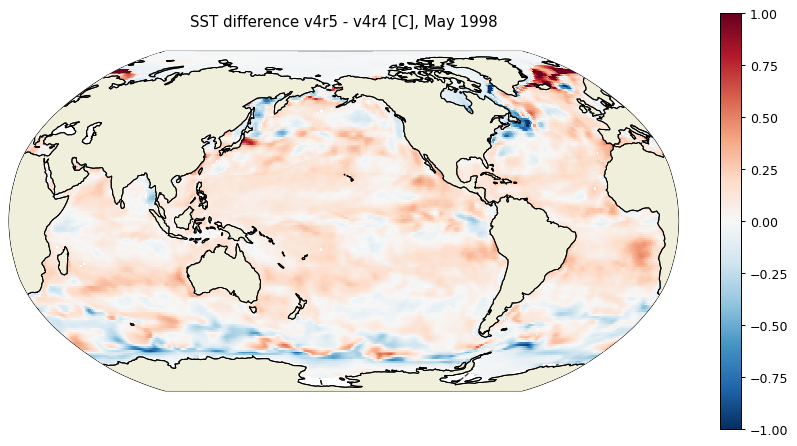

In [6]:
T_diff = ds_T_v4r5.THETA - ds_T_v4r4.THETA
plt.figure(figsize=(12,6), dpi= 90)
ecco.plot_proj_to_latlon_grid(ds_T_v4r4.XC, ds_T_v4r4.YC, \
                              T_diff.isel(time=4,k=0), \
                              user_lon_0=-160,\
                              projection_type='robin',\
                              plot_type='pcolormesh', \
                              cmap='RdBu_r',\
                              dx=1,dy=1,cmin=-1, cmax=1,show_colorbar=True)
plt.title('SST difference v4r5 - v4r4 [C], May 1998\n')
plt.show()

## Momentum budget terms in v4r5

Now, let's consider a dataset that was *only* archived in v4r5, not v4r4: the terms of the momentum budget. We will access and view the terms of the $u$-momentum budget, i.e., the momentum along the $x$-axis of the llc90 native grid.

> **Note:** ECCOv4r5 has two different sets of momentum budget terms archived. The first set (options 1 and 2) below quantifies the effect of (lateral) vorticity advection vs. other advection terms that contribute to the momentum budget (vertical and kinetic energy gradient). The second set (options 5 and 6) consists of the primitive equation terms that describe $u$- and $v$-momentum tendency, which you probably learned in introductory fluid dynamics classes. We consider the second set below.

In [7]:
# u-momentum budget terms
ds_u_mom = ea.ecco_podaac_to_xrdataset('momentum',\
                                            version='v4r5',grid='native',time_res='monthly',\
                                            StartDate='1998-01',EndDate='1998-12',\
                                            mode='s3_open_fsspec',\
                                            prompt_request_payer=False)

ShortName Options for query "momentum":
                  Variable Name     Description (units)

Option 1: ECCO_L4_OCEAN_3D_MOMENTUM_ADV_TEND_X_LLC0090GRID_MONTHLY_V4R5    *native grid,monthly means*
                  Um_AdvZ3          U momentum tendency from vorticity advection.
                                    (m/s^2)
                  Um_AdvRe          U momentum tendency from vertical advection,
                                    explicit part. (m/s^2)
                  Um_dKEdx          U momentum tendency from grad KE. (m/s^2)

Option 2: ECCO_L4_OCEAN_3D_MOMENTUM_ADV_TEND_Y_LLC0090GRID_MONTHLY_V4R5    *native grid,monthly means*
                  Vm_AdvZ3          V momentum tendency from vorticity advection.
                                    (m/s^2)
                  Vm_AdvRe          V momentum tendency from vertical advection,
                                    explicit part. (m/s^2)
                  Vm_dKEdy          V momentum tendency from grad KE. (m/s^2)

Option 

Please select option [1-6]:  5


Using dataset with ShortName: ECCO_L4_OCEAN_3D_MOMENTUM_TEND_X_LLC0090GRID_MONTHLY_V4R5


Select option 5 to look at the primitive equation $u$-momentum terms.

Let's plot the Coriolis and pressure gradient contributions to the model $u$-momentum budget on tile 7 (North Pacific). This is a rotated tile, which means the positive $x$ direction is *southward*. Hence the $u$-momentum budget corresponds to approximately the meridional momentum budget, with the sign reversed.

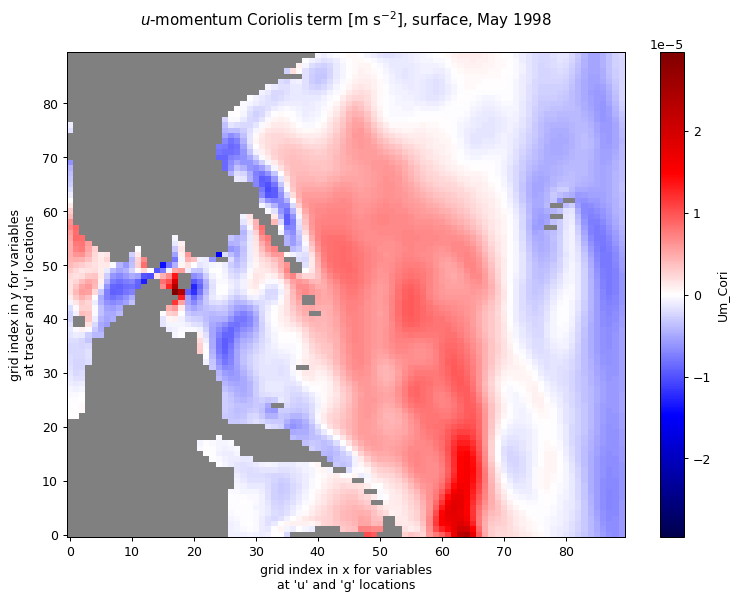

In [8]:
import matplotlib as mpl
seismic_nanmasked = mpl.colormaps['seismic'].copy()
seismic_nanmasked.set_bad('gray')

plt.figure(figsize=(10,7), dpi= 90)
ds_u_mom.Um_Cori.isel(time=4,k=0,tile=7).plot(cmap=seismic_nanmasked)
plt.title('$u$-momentum Coriolis term [m s$^{-2}$], surface, May 1998\n')
plt.show()

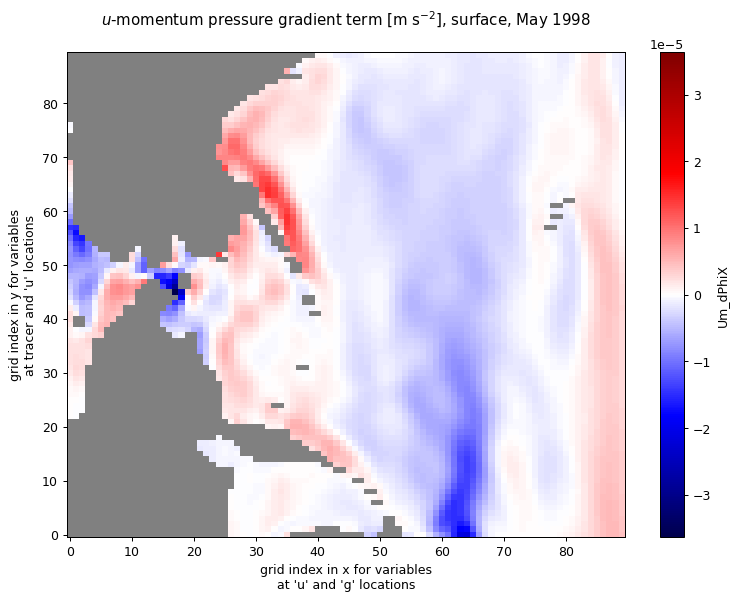

In [9]:
plt.figure(figsize=(10,7),dpi=90)
ds_u_mom.Um_dPhiX.isel(time=4,k=0,tile=7).plot(cmap=seismic_nanmasked)
plt.title('$u$-momentum pressure gradient term [m s$^{-2}$], surface, May 1998\n')
plt.show()

The fact that these two terms are nearly equal and opposite reflects the dominance of geostrophic balance. The sum of the Coriolis and pressure gradient terms (1st plot below) is balanced mostly by two frictional terms (2nd plot below): the sum of the surface (Ekman) stress included in the external forcing term `Um_Ext`, and the implicit dissipation of momentum `Um_ImplD`.

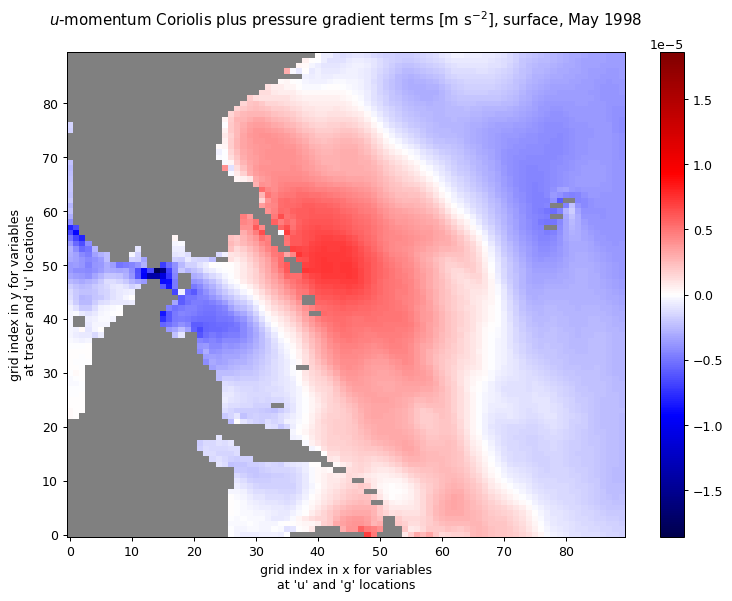

In [10]:
Um_Cori_plus_pgrad = ds_u_mom.Um_Cori + ds_u_mom.Um_dPhiX

plt.figure(figsize=(10,7),dpi=90)
Um_Cori_plus_pgrad.isel(time=4,k=0,tile=7).plot(cmap=seismic_nanmasked)
plt.title('$u$-momentum Coriolis plus pressure gradient terms [m s$^{-2}$], surface, May 1998\n')
plt.show()

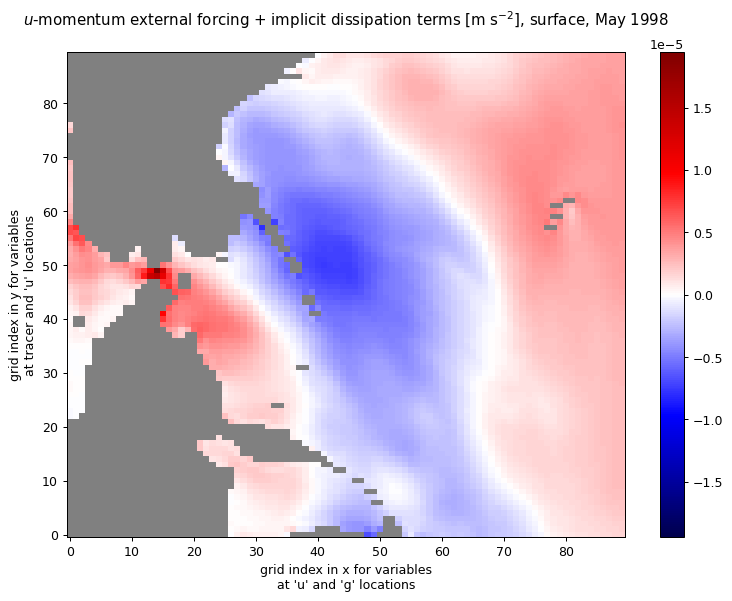

In [11]:
Um_Ext_plus_ImplD = ds_u_mom.Um_Ext + ds_u_mom.Um_ImplD

plt.figure(figsize=(10,7),dpi=90)
Um_Ext_plus_ImplD.isel(time=4,k=0,tile=7).plot(cmap=seismic_nanmasked)
plt.title('$u$-momentum external forcing + implicit dissipation terms [m s$^{-2}$], surface, May 1998\n')
plt.show()

Notice that the two term combinations above are nearly equal in magnitude and opposite in sign.

If we look at a level well below the surface (~200 m), the residual after summing the Coriolis and pressure gradient terms is even smaller.

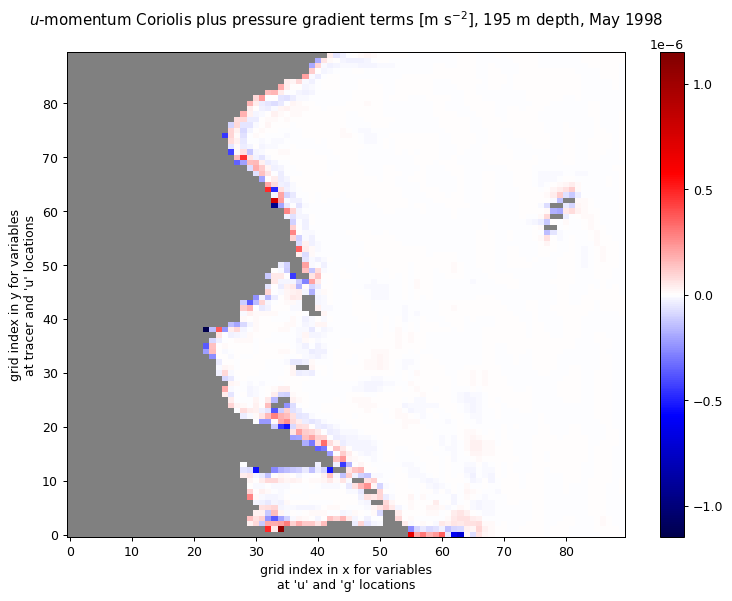

In [12]:
k_plot = 16

plt.figure(figsize=(10,7),dpi=90)
Um_Cori_plus_pgrad.isel(time=4,k=k_plot,tile=7).plot(cmap=seismic_nanmasked)
# the syntax "%.0f" % X" rounds X to the nearest integer, with 0 digits after the decimal point
plt.title('$u$-momentum Coriolis plus pressure gradient terms [m s$^{-2}$], '\
            +f'{"%.0f" % -Um_Cori_plus_pgrad.Z[k_plot].values} m depth, May 1998\n')
plt.show()

> **Exercise:** Try plotting the terms of the meridional momentum budget globally. To do this successfully you will need both the $u$- and $v$-momentum terms, and to interpolate and rotate them using the $CS$ and $SN$ parameters in the grid file (you can use the v4r4 grid file for this). [This tutorial](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Gradient_calc_on_native_grid.html) is a good resource for how to do the interpolation/rotation on the llc90 grid.